In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("clean_data.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,sunroof,alloywheels,aircondition,nav,bluetooth,pushstart,parkingassist,cruisecontrol,trailerhitch,url,...,make,model,colour,body,doors,seating,transmission,fuel,km,description
0,1,1,1,0,0,0,0,1,0,https://www.kijiji.ca/v-cars-trucks/city-of-to...,...,Toyota,4Runner,Grey,"SUV, Crossover",4,5,Automatic,Gasoline,384900.0,3rd Gen Toyota 4RunnerRunning strong at 385k. ...
1,1,1,1,0,0,0,0,1,0,https://www.kijiji.ca/v-cars-trucks/city-of-to...,...,Subaru,Outback,Blue,Wagon,5,5,Automatic,Gasoline,239000.0,"Subaru Outback 2005 2.5, 170 hp. With 239000 k..."
2,0,0,1,0,1,1,0,0,0,https://www.kijiji.ca/v-cars-trucks/city-of-to...,...,Mazda,Other,Silver,Sedan,4,5,Automatic,Gasoline,66000.0,"10,900 or best offer\r\nMazda3 CX in amazing c..."
3,0,0,0,0,0,0,0,0,0,https://www.kijiji.ca/v-cars-trucks/city-of-to...,...,Suzuki,Swift,Black,Sedan,4,5,Manual,Gasoline,214300.0,"2007 Suzuki swift, good condition, unfortunate..."
4,0,0,1,0,1,0,0,1,0,https://www.kijiji.ca/v-cars-trucks/city-of-to...,...,Honda,Civic,Silver,Sedan,4,4,Automatic,Gasoline,227850.0,2003 Honda Civic in very good condition does n...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sunroof        2734 non-null   int64  
 1   alloywheels    2734 non-null   int64  
 2   aircondition   2734 non-null   int64  
 3   nav            2734 non-null   int64  
 4   bluetooth      2734 non-null   int64  
 5   pushstart      2734 non-null   int64  
 6   parkingassist  2734 non-null   int64  
 7   cruisecontrol  2734 non-null   int64  
 8   trailerhitch   2734 non-null   int64  
 9   url            2734 non-null   object 
 10  title          2734 non-null   object 
 11  price          2734 non-null   float64
 12  condition      2734 non-null   object 
 13  year           2734 non-null   float64
 14  make           2734 non-null   object 
 15  model          2734 non-null   object 
 16  colour         2734 non-null   object 
 17  body           2734 non-null   object 
 18  doors   

In [4]:
# Densities of the features
# what cars have the highest kms?

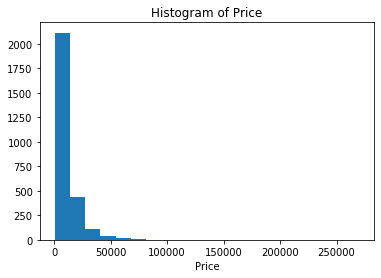

In [151]:
# Price is heavily leaning towards the first bin, maybe log will map it nicely
plt.hist(df.price, bins=20);
plt.xlabel('Price');
plt.title("Histogram of Price");

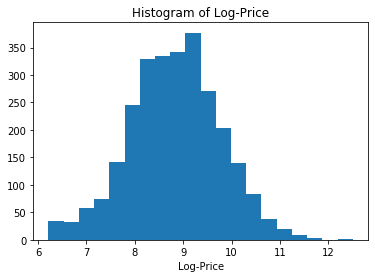

In [148]:
plt.hist(np.log(df.price), bins=20);
plt.xlabel('Log-Price');
plt.title("Histogram of Log-Price");

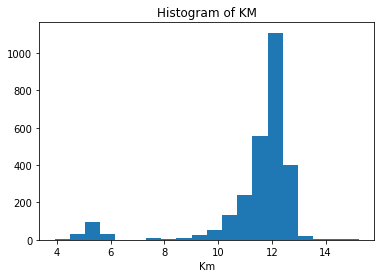

In [160]:
plt.hist(np.log(df.km), bins=20);
plt.xlabel('Km');
plt.title("Histogram of Log-KM");

After doing a logarithmic transformation on the price, the histogram suggests a normal distribution which is good for regression. Even after a logarithmic transformation of KM, the data is skewed left and might need more transformations to make it normal in order to improve the performance of regression models.

In [64]:
def classify_price(x):    
    if x<4000:
        return "<$4000"
    
    if x >= 4000 and x <= 10000:
        return "$4000-$10000"
    
    if x>10000:
        return ">$10000"
    return "NA"

In [65]:
df['classifications'] = df.price.apply(classify_price)

In [66]:
# Effect of make to price
piv = pd.pivot_table(df,index=['make'],columns='classifications',values=[],aggfunc=len)
piv.fillna(0, inplace=True)
piv = piv[['<$4000','$4000-$10000','>$10000']]
piv = piv.div(piv.sum(axis=1), axis = 0) * 100

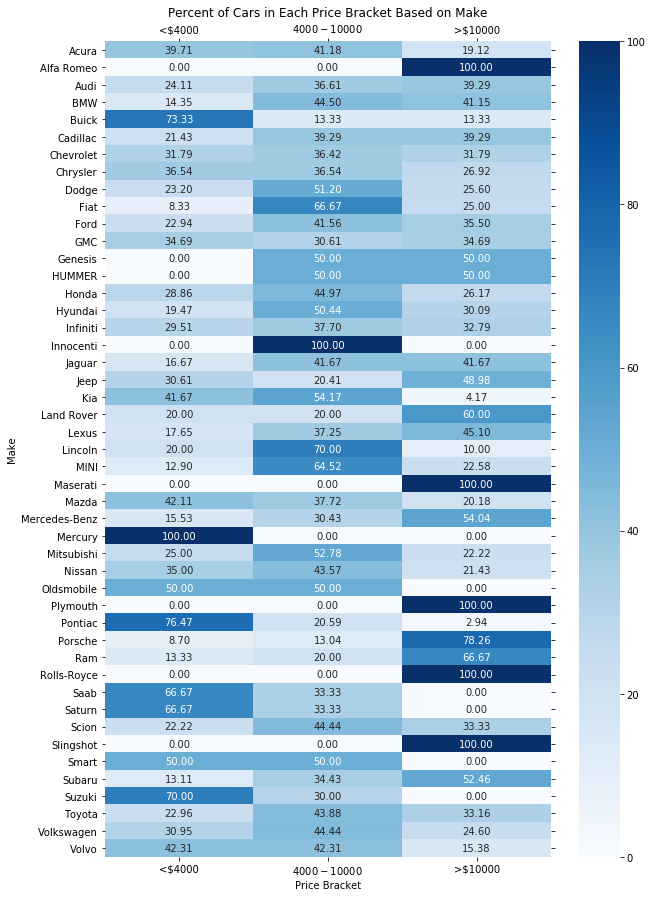

In [67]:
plt.subplots(figsize=(10,15))
sns.heatmap(piv,cmap="Blues",annot=True,fmt=".2f");
plt.xlabel("Price Bracket")
plt.ylabel("Make");
plt.title("Percent of Cars in Each Price Bracket Based on Make");
plt.tick_params(right=True, top=True, labeltop=True,rotation=0);

Premium luxury European imports such as BMW, Porsche, Audi and Mercedes-Benz have most of their cars listed at \\$10000 or higher. Brands such as Toyota, Honda, Kia, Nissan and Chevrolet have their cars mostly listed under \\$10000. The less than \\$4000 cars tend to affect discontinued makes such as Oldsmobile and Saturn which explains the low pricing. Other makes such as suzuki and pontiac could be due to the lower perception of brand quality in the used market.

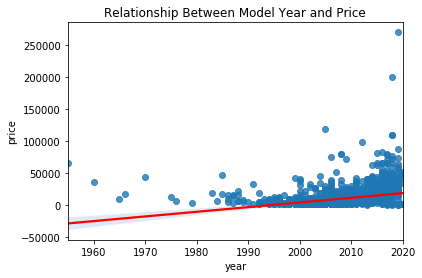

In [21]:
g = sns.regplot(x="year",y="price",data=df);
regline = g.get_lines()[0]
regline.set_color('red')
plt.title("Relationship Between Model Year and Price");

As expected, a newer car in general will command a higher price

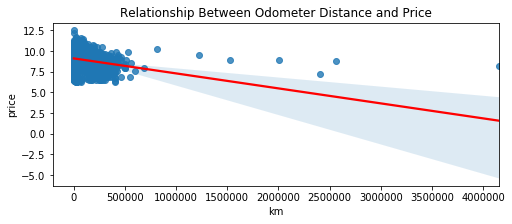

In [141]:
plt.subplots(figsize=(8,3))
g = sns.regplot(x="km",y=np.log(df.price),data=df);
regline = g.get_lines()[0]
regline.set_color('red')
plt.title("Relationship Between Odometer Distance and Price");

More kilometers driven means the car's value generally is lower.

In [121]:
def draw_boxplots(df, cols,target,func):
    for col in cols:
        sns.boxplot(x=df[col], y=func(df[target]));
        plt.title("Boxplot of {}".format(col));
        plt.ylabel("Log-Price")
        plt.show();

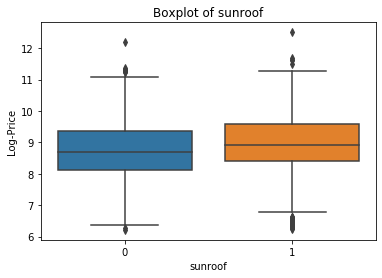

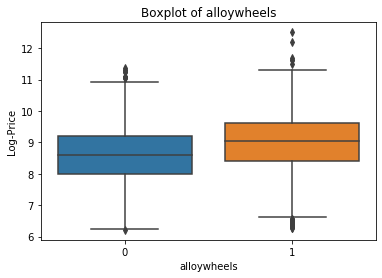

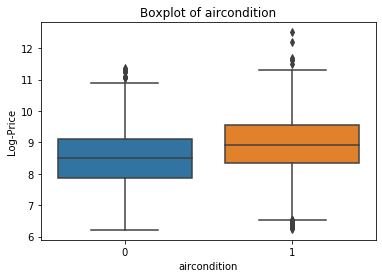

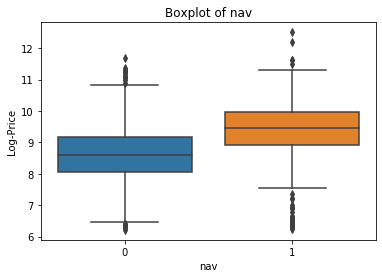

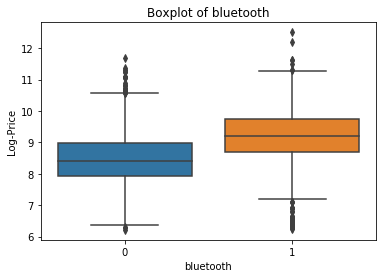

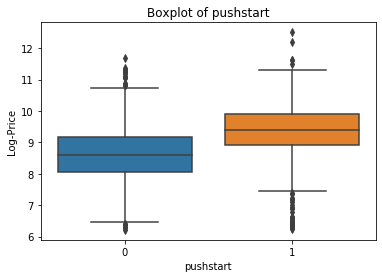

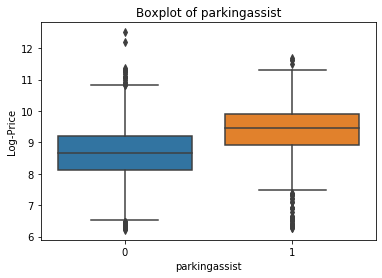

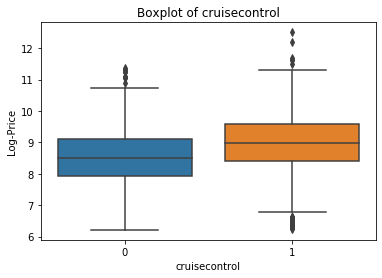

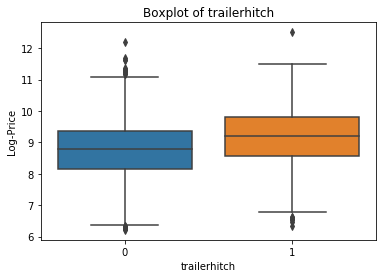

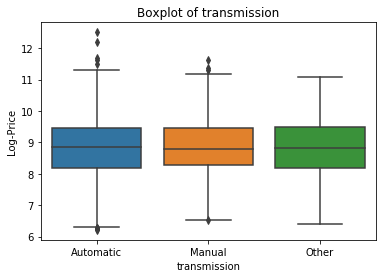

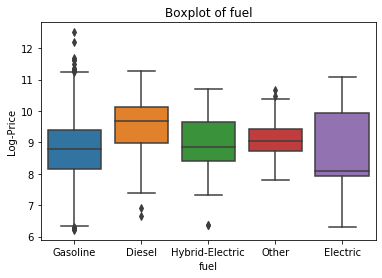

In [122]:
columns = np.append(df.columns[0:9],df.columns[20:22]) 
draw_boxplots(df,columns,"price",np.log)

From the box plots, additional features such as a navigation dashboard, alloy wheels, etc on average increase the price of the used car.There doesn't seem to be much of a difference in pricing between different transmissions but the variance in automatic car pricing is much higher, which can be due to the fact that there are more automatic cars for sale. Electric cars have a high variance, maybe it could be due to the resale value electric cars depends on the make more than the fuel. Diesel cars tended to be much more expensive than gasoline and electric cars. This can be explained because diesel engines cost more to build and in turn sell at a higher price at the showroom. 

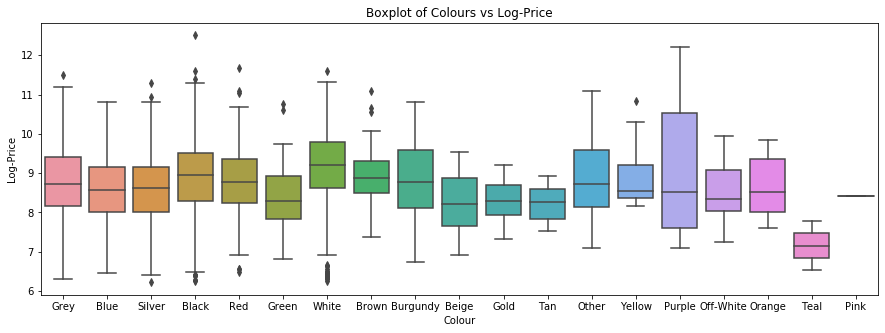

In [144]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=df.colour, y=np.log(df.price));
plt.ylabel("Log-Price");
plt.xlabel("Colour");
plt.title("Boxplot of Colours vs Log-Price");

The colour white seems to command the highest cost of a vehicle. Teal being the lowest. Purple seems to be th

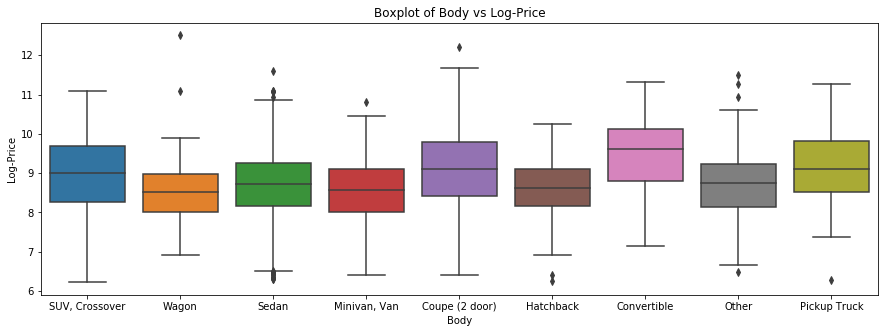

In [142]:
plt.subplots(figsize=(15,5))
sns.boxplot(x=df.body, y=np.log(df.price));
plt.ylabel("Log-Price");
plt.xlabel("Body");
plt.title("Boxplot of Body vs Log-Price");

Convertibles and coupes are the most expensive. Pickup trucks are just as expensive as coupe's on average, could be due to them being more expensive when adding additional and specific add-ons. 

22026.465794806718